# Demo example: Using a Dataset
 
This is an introduction to get started with the MetObs toolkit. These examples are making use of the demo data files that comes with the toolkit.
Once the MetObs toolkit package is installed, you can import its functionality by:

In [1]:
import metobs_toolkit

## The Dataset

A dataset is a collection of all observational data. Most of the methods are
applied directly to a dataset. Start by creating an empty Dataset object:

In [2]:
your_dataset = metobs_toolkit.Dataset()

The most relevant attributes of a Dataset are:
    * .df --> a pandas DataFrame where all the observational data are stored
    * .metadf --> a pandas DataFrame where all the metadata for each station are stored
    * .settings --> a Settings object to store all specific settings.
    * .missing_obs and .gaps --> here the missing records and gaps are stored if present.

Note that each Dataset will be equipped with the default settings.


We created a dataset and stored in under the variable 'your_dataset'.
The show method prints out an overview of data in the dataset:

In [3]:
your_dataset.show() # or .get_info()

--------  General --------- 

Empty instance of a Dataset.

 --------  Observation types --------- 

temp observation with: 
     * standard unit: Celsius 
     * data column as None in None 
     * known units and aliases: {'Celsius': ['celsius', '°C', '°c', 'celcius', 'Celcius'], 'Kelvin': ['K', 'kelvin'], 'Farenheit': ['farenheit']} 
     * description: 2m - temperature 
     * conversions to known units: {'Kelvin': ['x - 273.15'], 'Farenheit': ['x-32.0', 'x/1.8']} 
     * originates from data column: None with None as native unit.
humidity observation with: 
     * standard unit: % 
     * data column as None in None 
     * known units and aliases: {'%': ['percent', 'percentage']} 
     * description: 2m - relative humidity 
     * conversions to known units: {} 
     * originates from data column: None with None as native unit.
radiation_temp observation with: 
     * standard unit: Celsius 
     * data column as None in None 
     * known units and aliases: {'Celsius': ['celsius

TIP: to get an extensive overview of an object, call the .show() method on it.

## Importing data

To import your data into a Dataset, the following files are required:

* data file: This is the CSV file containing the observations
* (optional) metadata file: The CSV file containing metadata for all stations.
* template file: This is a CSV file that is used to interpret your data, and metadata file (if present).

In practice, you need to start by creating a template file for your data. More information on the creation of the template can be found in the documentation (under [Mapping to the toolkit](https://metobs-toolkit.readthedocs.io/en/move_to_rtd/topics/template_mapping.html#)).

TIP: *Use the template assistant of the toolkit for creating a template file by uncommenting and running the following cell.*


In [4]:
# metobs_toolkit.build_template_prompt()

To import data, you must specify the paths to your data, metadata and template.
For this example, we use the demo data, metadata and template that come with the toolkit.

In [5]:
your_dataset.update_settings(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)

The settings of your Dataset are updated with the required paths. Now the data can be imported into your empty Dataset:

In [6]:
your_dataset.import_data_from_file()

## Inspecting the Data

To get an overview of the data stored in your Dataset you can use

In [7]:
your_dataset.show()

--------  General --------- 

Dataset instance containing: 
     *28 stations 
     *['humidity', 'precip', 'precip_sum', 'pressure', 'pressure_at_sea_level', 'temp', 'wind_direction', 'wind_gust', 'wind_speed', 'radiation_temp'] observation types 
     *1092960 observation records 
     *0 records labeled as outliers 
     *50 gaps 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00 (total duration:  14 days 23:55:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations.

 --------  Observation types --------- 

temp observation with: 
     * standard unit: Celsius 
     * data column as Temperatuur in Celsius 
     * known units and aliases: {'Celsius': ['celsius', '°C', '°c', 'celcius', 'Celcius'], 'Kelvin': ['K', 'kelvin'], 'Farenheit': ['farenheit']} 
     * description: 2m-temperature 
     * conversions to known units: {'Kelvin': ['x - 273.15'], 'Farenheit': ['x-32.0', 'x/1.8']} 
     * originates from data column: Temp

If you want to inspect the data in your Dataset directly, you can take a look at the .df and .metadf attributes

In [8]:
print(your_dataset.df.head())
# equivalent for the metadata
print(your_dataset.metadf.head())


                                              value
name      obstype  datetime                        
vlinder01 humidity 2022-09-01 00:00:00+00:00   65.0
                   2022-09-01 00:05:00+00:00   65.0
                   2022-09-01 00:10:00+00:00   65.0
                   2022-09-01 00:15:00+00:00   65.0
                   2022-09-01 00:20:00+00:00   65.0
           network        lat       lon       call_name  location  \
name                                                                
vlinder01  Vlinder  50.980438  3.815763      Proefhoeve     Melle   
vlinder02  Vlinder  51.022379  3.709695          Sterre      Gent   
vlinder03  Vlinder  51.324583  4.952109         Centrum  Turnhout   
vlinder04  Vlinder  51.335522  4.934732  Stadsboerderij  Turnhout   
vlinder05  Vlinder  51.052655  3.675183  Watersportbaan      Gent   

                           geometry  lcz assumed_import_frequency  \
name                                                                
vlinder01  POI

### Inspecting a Station

If you are interested in one station, you can extract all the info for that one station from the dataset by:


In [9]:
favorite_station = your_dataset.get_station(stationname="vlinder02")

Favorite station now contains all the information of that one station. All methods that are applicable to a Dataset are also applicable to a Station. So to inspect your favorite station, you can:

In [10]:
print(favorite_station.show())

--------  General --------- 

Dataset instance containing: 
     *1 stations 
     *['humidity', 'precip', 'precip_sum', 'pressure', 'pressure_at_sea_level', 'radiation_temp', 'temp', 'wind_direction', 'wind_gust', 'wind_speed'] observation types 
     *43200 observation records 
     *0 records labeled as outliers 
     *21 gaps 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00 (total duration:  14 days 23:55:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations.

 --------  Observation types --------- 

temp observation with: 
     * standard unit: Celsius 
     * data column as Temperatuur in Celsius 
     * known units and aliases: {'Celsius': ['celsius', '°C', '°c', 'celcius', 'Celcius'], 'Kelvin': ['K', 'kelvin'], 'Farenheit': ['farenheit']} 
     * description: 2m-temperature 
     * conversions to known units: {'Kelvin': ['x - 273.15'], 'Farenheit': ['x-32.0', 'x/1.8']} 
     * originates from data column: Tempera

## Making timeseries plots

To make timeseries plots, use the following syntax to plot the *temperature* observations of the full Dataset:

<Axes: title={'center': 'Temperatuur for all stations. '}, ylabel='temp (Celsius)'>

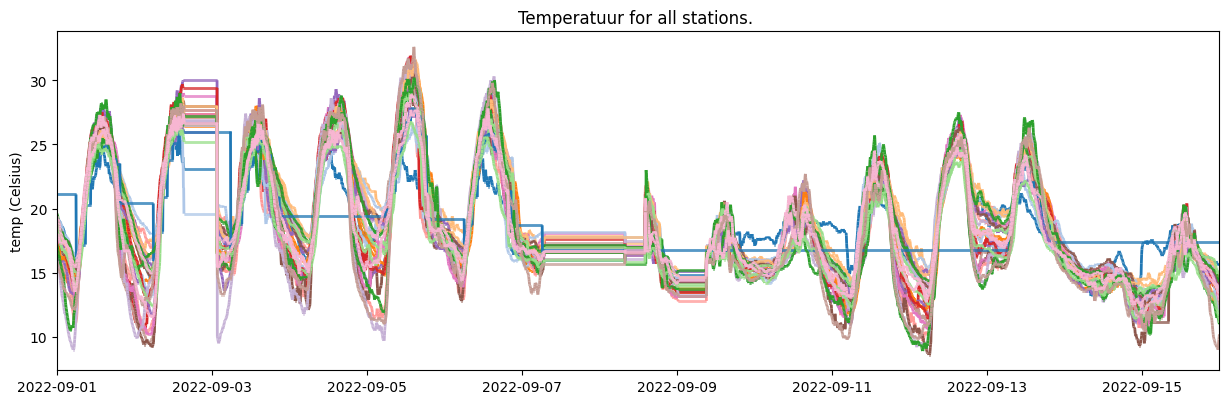

In [11]:
your_dataset.make_plot(obstype='temp')

See the documentation of the ``make_plot()`` method for more details. Here an example of common used arguments.

<Axes: title={'center': 'your custom title'}, xlabel='datetime', ylabel='humidity (%)'>

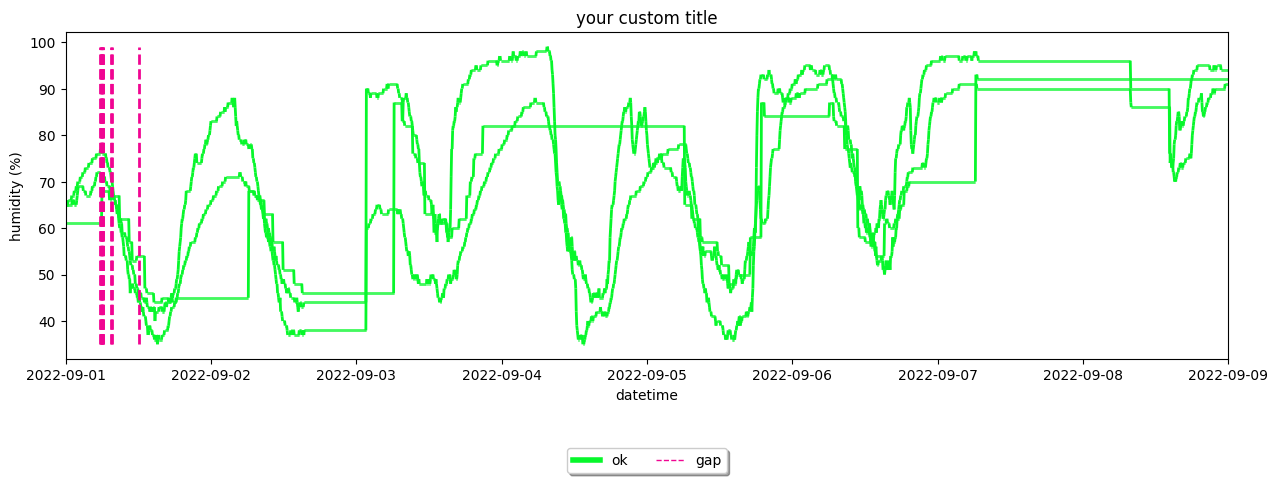

In [12]:
#Import the standard datetime library to make timestamps from datetime objects
from datetime import datetime

your_dataset.make_plot(
    # specify the names of the stations in a list, or use None to plot all of them.
    stationnames=['vlinder01', 'vlinder03', 'vlinder05'],
    # what obstype to plot (default is 'temp')
    obstype="humidity",
    # choose how to color the timeseries:
    #'name' : a specific color per station
    #'label': a specific color per quality control label
    colorby="label",
    # choose a start and endtime for the series (datetime).
    # Default is None, which uses all available data
    starttime=None,
    endtime=datetime(2022, 9, 9),
    # Specify a title if you do not want the default title
    title='your custom title',
    # Add legend to plot?, by default true
    legend=True,
    # Plot observations that are labeled as outliers.
    show_outliers=True,
)

as mentioned above, one can apply the same methods to a Station object:

/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:1869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = "ok"
/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:1870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["toolkit_representation"] = "observation"


<Axes: title={'center': 'Temperatuur of vlinder02'}, xlabel='datetime', ylabel='temp (Celsius)'>

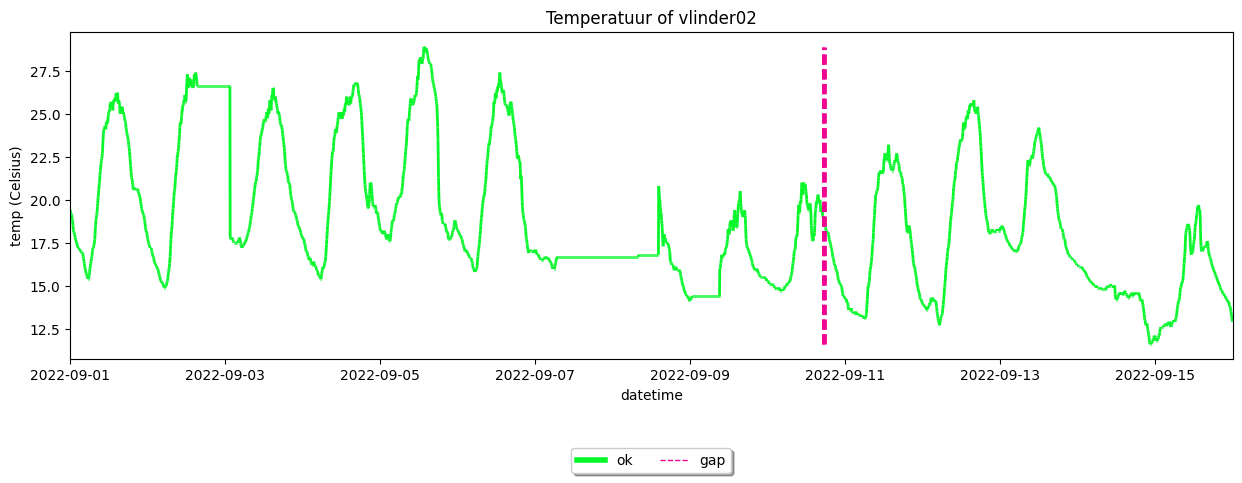

In [13]:
favorite_station.make_plot(colorby='label')

## Resampling the time resolution

Coarsening the time resolution (i.g. frequency) of your data can be done by using the ``coarsen_time_resolution()``.

In [14]:
your_dataset.coarsen_time_resolution(freq='30T') #'30T' means 30 minutes

your_dataset.df.head()

value label  \
name      obstype  datetime                                 
vlinder01 humidity 2022-09-01 00:00:00+00:00   65.0    ok   
                   2022-09-01 00:30:00+00:00   65.0    ok   
                   2022-09-01 01:00:00+00:00   65.0    ok   
                   2022-09-01 01:30:00+00:00   65.0    ok   
                   2022-09-01 02:00:00+00:00   68.0    ok   

                                             toolkit_representation  
name      obstype  datetime                                          
vlinder01 humidity 2022-09-01 00:00:00+00:00            observation  
                   2022-09-01 00:30:00+00:00            observation  
                   2022-09-01 01:00:00+00:00            observation  
                   2022-09-01 01:30:00+00:00            observation  
                   2022-09-01 02:00:00+00:00            observation

## Introduction exercise

For a more detailed reference, you can use this [introduction exercise](https://github.com/vergauwenthomas/MetObs_toolkit/blob/4d5a35954eb8ff153eb0d9e9c8a34cee7e3c50f4/fairness_demo_exercises/Introduction_01.ipynb), that was created in the context of the [COST FAIRNESS](https://www.cost.eu/actions/CA20108/) summerschool 2023 in Ghent.